# Jupyter の実行例
+ 以下，`Shift+Enter` により各セルが実行できる
+ とりあえず，どのようなことができるかを確認できれば十分である．
+ 具体的な使い方については，資料の3章以降で扱うことにする．

まずは↓のセルを `Shift+Enter` で実行すること

In [11]:
# 最初にこのセルを選択して、実行すること
from IPython.display import display, Math
from sympy import *
init_session()


IPython console for SymPy 1.3 (Python 3.6.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.3/



+ [数値計算](#numerical)
+ [整数論](#number)
+ [グラフの描画](#graph)
+ [数式処理](#cas)
+ [(参考)ipywidgets による動的表示](#ipywidgets)

### <div id="numerical">数値計算</div>
+ 小数の四則演算はそのまま利用できる．
+ 基本的に桁溢れは気にする必要はない

In [12]:
12345678*9+9

+ べき乗は `**` を用いる．
+ $2^{127}-1$ は素数として知られている(12番目のメルセンヌ素数)
+ 13番目のメルセンヌ素数は $2^{521}-1$ である

In [13]:
2**127-1

### <div id="number">整数論</div>
+ `factor` によりある程度小さな数ならば素因数分解が可能
+ $2^{2^n}+1$ は $n\le 4$ のときは素数であるが，$n\ge 5$ のときは合成数しか知られていない

In [14]:
n=2**(2**5)+1
print(n)
factorint(n)

4294967297


+ 一方，与えられた2つの整数に対して，その最大公約数 (gcd) はユークリッドの互除法により簡単に求められる
+ `%` は余りの演算

In [15]:
a=123*456+789+1
b=987*654*321+1
print("gcd(%d,%d)"%(a,b))
while (b>0):
    a,b=b,a%b
    print("=gcd(%d,%d)"%(a,b))
print("=%d"%a)

gcd(56878,207204859)
=gcd(207204859,56878)
=gcd(56878,55183)
=gcd(55183,1695)
=gcd(1695,943)
=gcd(943,752)
=gcd(752,191)
=gcd(191,179)
=gcd(179,12)
=gcd(12,11)
=gcd(11,1)
=gcd(1,0)
=1


+ 余りの計算はコンピュータの世界では頻繁に用いられる
+ $p$ が素数ならば，$p$ と互いに素である $a$ に対して，$a^{p-1}$ を $p$ で割った余りは $1$ になることが知られている

In [16]:
a,p=2,65537
(a**(p-1))%p

### <div id="graph">グラフの描画</div>

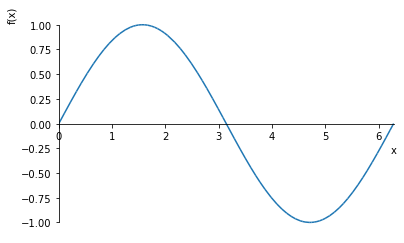

In [17]:
f=sin(x)
p1=plot(f,(x,0,2*pi)) # plot(「関数」,(「変数」,「開始値」,「終了値」))

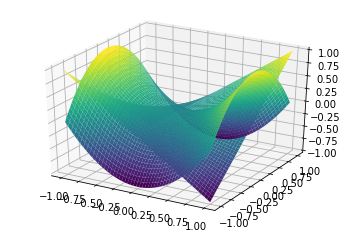

In [18]:
# 3次元グラフの描画
plotting.plot3d(x**2-y**2,x*y,(x,-1,1),(y,-1,1))

### <div id="cas">数式処理</div>
+ `expand` で展開ができる

In [19]:
expand((x+y)**3)

+ `factor` で因数分解

In [20]:
factor(x**16-y**16)

+ `solveset` で方程式または不等式を解くことができる
+ 多元方程式は `solve` を用いる

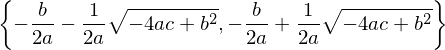

In [12]:
# 2次方程式の解の公式
var('a,b,c')
solveset(a*x**2+b*x+c,x)

+ 3次方程式の解の公式もある(4次まではあるが)
+ 5次以上では公式が存在しないことが知られている

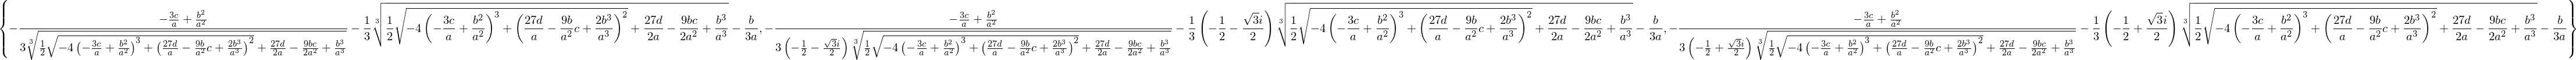

In [13]:
# 3次方程式の解の公式
var('a,b,c,d')
solveset(a*x**3+b*x**2+c*x+d,x)

## <div id="ipywidgets">参考: ipywidgets による動的表示</div>
+ ipywidgets というパッケージを用いることで，変数の設定による動的な様子を知ることができる
+ 資料の内容を超えるものだが，興味のある者は調べてみると良いだろう


In [7]:
# 因数分解
from ipywidgets import interact
@interact
def _(n=(1,10000,1)):
    return factorint(n)

interactive(children=(IntSlider(value=5000, description='n', max=10000, min=1), Output()), _dom_classes=('widg…

In [8]:
# ユークリッドの互除法
from ipywidgets import interact
@interact
def _(n=(1,10000,1),m=(1,10000,1)):
    returnstr = "\gcd(%d,%d)"%(n,m)
    while m>0:
        n,m=m,n%m
        returnstr += "\\\\=\gcd(%d,%d)"%(n,m)
    returnstr += "\\\\=%d"%(n)
    return Math(returnstr)

interactive(children=(IntSlider(value=5000, description='n', max=10000, min=1), IntSlider(value=5000, descript…

In [9]:
%matplotlib inline
# 3次不等式
from ipywidgets import interact
@interact
def _(p=(-10,10, 1), q=(-10,10, 1),r=(-10,10,1)):
    f=(x-p)*(x-q)*(x-r)
    x0=min(p,q,r)-1
    x1=max(p,q,r)+1
    plot(f,(x,x0,x1))
    return Math(latex(f)+">0:\quad "+latex(solveset(f>0,x,S.Reals)))

interactive(children=(IntSlider(value=0, description='p', max=10, min=-10), IntSlider(value=0, description='q'…

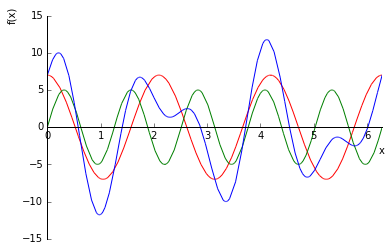

<IPython.core.display.Math object>

In [18]:
%matplotlib inline
# 三角関数の合成
from ipywidgets import interact
@interact
def _(a1=(0,10),b1=(0,10),a2=(0,10),b2=(0,10)):
    fc = a1*cos(b1*x)
    fs = a2*sin(b2*x)
    f=fc+fs
    p=plot(fc,fs,f,(x,0,2*pi),show=False)
    p[0].line_color="red"
    p[1].line_color="green"
    p.show()
    return Math("\color{red}{"+latex(fc)+"}+\color{green}{"+ latex(fs)+ "}=\color{blue}{"+latex(f)+"}")